In [13]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import dataframe_image as dfi
#Dependencies
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain


#123
user_file = "C:\\Users\\zachi\\Desktop\\final_project_22\\data_nov_21.xlsx"
df=pd.read_excel(user_file)


In [14]:
#remove column - "removed 1"

df.drop(columns=['Removed 1'],inplace=True)

In [15]:
#make category easier to understand 

df=df.replace({'Category' : { 'Y' : "Antisemitic", 'W' : "Non-Antisemitic", 'U' : "Anti-Zionist" }})


In [16]:
#convert "time stamp" to english

df = df.rename(columns={"חותמת זמן":"Time stamp"})


In [17]:
#fix summary column texts

df = df.replace(r'\n',' ', regex=True) 

post_description=df["A short summary of the content- write briefly in your own words "]


In [18]:
#change the date time to the d/m/y

from datetime import datetime
df['Time stamp'] = pd.to_datetime(df['Time stamp'], errors='coerce') #This function convert the date text into dt.date type


תכנים לפי רשת - גרף עמודות ויזואלי לניטור התכנים לפי סוג ולפי תקופה

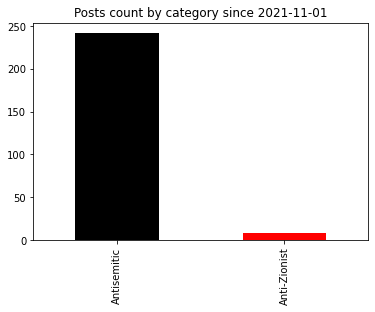

In [19]:
list = ["Anti-Zionist",
"Antisemitic",
"Non-Antisemitic"]

df = df.loc[df['Category'] .isin(list)]
#This line is keeping rows which have one of the categories

user_input = "2021-11-01"
the_user_target_date = df["Time stamp"]>user_input
new_df = df[the_user_target_date]
post_count_by_category = new_df["Category"].value_counts().plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan'],title = "Posts count by category since" + " " + user_input)

אחוזים של תכנים שהוסרו מכל הרשתות (גרף עוגה)

<AxesSubplot:title={'center':'How many posts removed in 1st, 2nd time or never?'}, ylabel='Removed'>

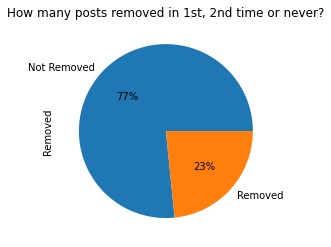

In [20]:
#Cheking the percentage of posts removing in general view

status = df["Removed"]

general_removal_view = status.value_counts() #get general info about the removal process of platforms

general_removal_view.plot(kind = "pie" , autopct='%1.0f%%', title = "How many posts removed in 1st, 2nd time or never?") 


Non-removed content - although recognized as antisemitic


<AxesSubplot:ylabel='Removed'>

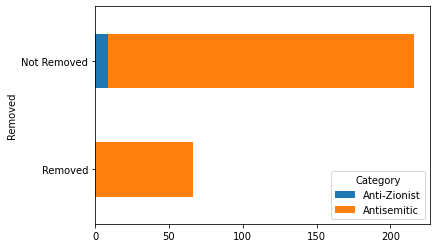

In [21]:

outpot_category_removal_stats= df.groupby(['Removed', 'Category'])['Category'].count().unstack('Category').fillna(0).astype(int).reindex(index = ['Removed','Not Removed'])
outpot_category_removal_stats = outpot_category_removal_stats.astype("int")
print ("Non-removed content - although recognized as antisemitic")
outpot_category_removal_stats

outpot_category_removal_stats_plot= outpot_category_removal_stats.plot(kind='barh', stacked=True,mark_right = True )
outpot_category_removal_stats_plot

In [22]:
precentage_chart = outpot_category_removal_stats/outpot_category_removal_stats[outpot_category_removal_stats.columns].sum()*100
precentage_chart.round(1).astype(str) +'%'


Category,Anti-Zionist,Antisemitic
Removed,,
Removed,0.0%,24.2%
Not Removed,100.0%,75.8%
